
# Project: Sales analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#lr">Linear Regression</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

> This project is concerned with the analysis of Store Sales. Particularly,  the project aims at  providing some summary statistics, data analysis and visualizations in order to describe the dataset. Additionally, the project analyzes whether certain factors related to the store sales.

In [1]:
# importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading data and print out a few lines.
df = pd.read_csv(r"C:\Users\Kimo Store\Stores.csv")

df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


From reading the dataset, it can be seen that each row is a particular store, store id  is unique identifiers for each store, Store area is Physical Area of the store in yard square, Items_Available are the Number of different items available in the corresponding store, Daily Customer Count is the Number of customers who visited to stores on an average over month. Daily Customer Count is the Number of customers who visited to stores on an average over month. Finally, Store_Sales are Sales in (US $) that stores made.

In [3]:
# checking the data shape (we have 896 observations with 5 features)
df.shape

(896, 5)

# Describe the data

In [4]:
#summary statistics of the data
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


From data description, it can be noted that the average Store area is 1485 although some stores reached 2229. The average number of items available is 1782 while the average Daily_Customer_Count is 786. The store sales range from 14920 to 116320, with an average of 59351. Generally, the mean and the median of the features are closely related; indicating the absence of outliers. 

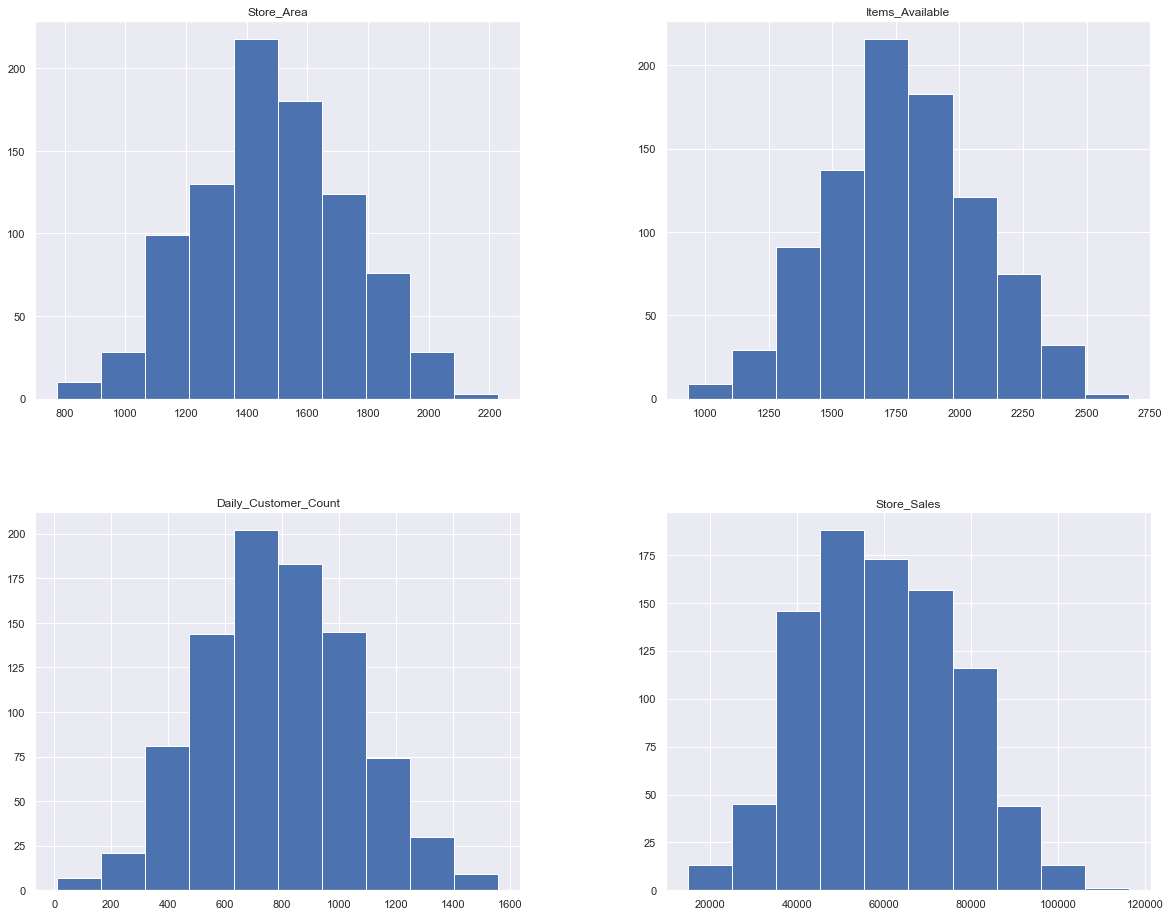

In [5]:
# describe the data visually
data = df[['Store_Area','Items_Available','Daily_Customer_Count', 'Store_Sales']]
data.hist(figsize = (20,16));


From the histograms, it can be noted that All features and target variable seem to be following a normal distribution. Hence, we don't need to apply any type of transformation.


In [6]:
# inspect data types and look for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


All features are integers and There are no missing values.

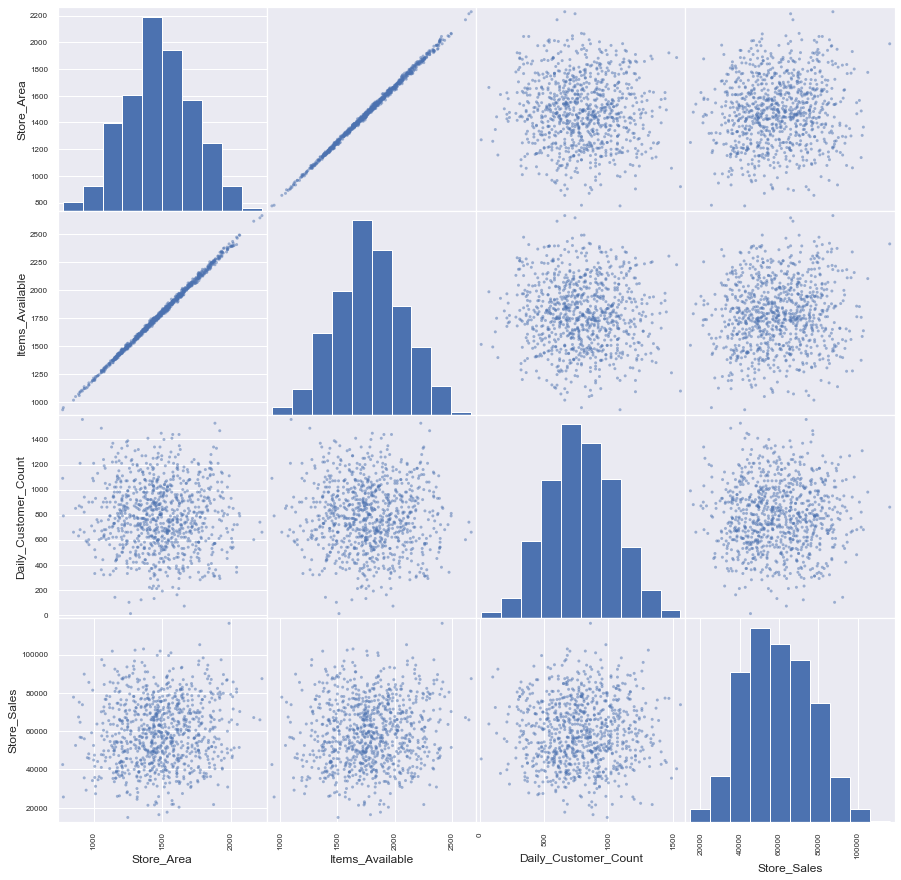

In [7]:
pd.plotting.scatter_matrix(data, figsize = (15,15));


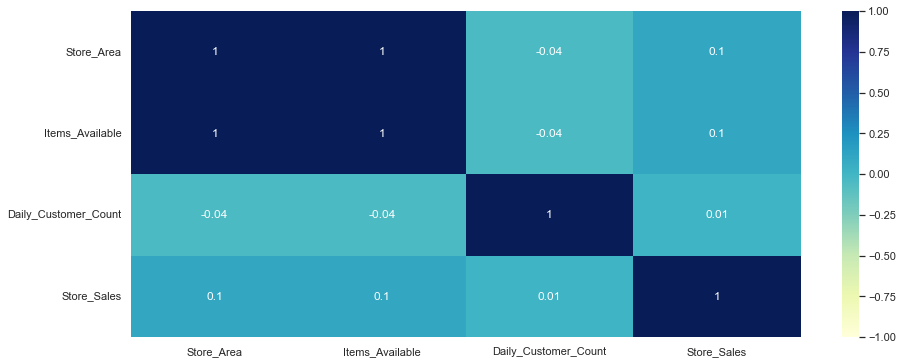

In [8]:
plot.figure(figsize= (15, 6))
sns.heatmap(data.corr().round(2), annot= True, cmap= 'YlGnBu',  vmin= -1);


The data information reveals items available and store area have perfect correlation.Therefore, I will drop the feature items avaliable. Additionally, all other pairs of different features in the dataset have a high concentration at the center.

In [43]:
# Dropping column I will not include in the analysis
data = data.drop(['Items_Available'], axis=1)

In [32]:
# checking for the amendments 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


<a id='eda'></a>
## Exploratory Data Analysis

## Is the average store sales associated with daily customer count?

In [16]:

subset1 = data.groupby((data.Daily_Customer_Count//250)*250).mean()
subset1.rename(columns = lambda x:x[:100]+'_mean', inplace = True)
subset1

,Store_Area_mean,Items_Available_mean,Daily_Customer_Count_mean,Store_Sales_mean
Daily_Customer_Count,,,,
0,1443.666667,1733.066667,163.333333,59396.000000
250,1511.732143,1813.312500,400.446429,59399.732143
500,1491.418773,1788.613718,634.043321,58293.140794
750,1477.633898,1773.132203,864.067797,59874.610169
1000,1483.031646,1779.727848,1103.037975,60187.721519
1250,1454.297297,1745.216216,1334.324324,59487.297297
1500,1402.500000,1663.500000,1545.000000,57080.000000


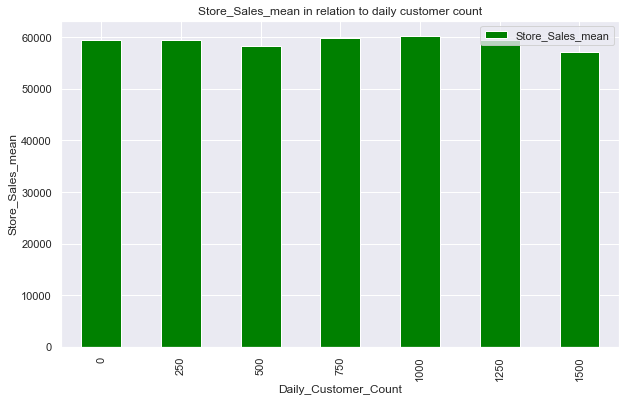

In [34]:
subset1.loc[:,['Store_Sales_mean']].plot(kind = 'bar', color = 'green', figsize = (10,6));
plot.title('Store_Sales_mean in relation to daily customer count')
plot.ylabel('Store_Sales_mean')

plot.show()

The figure show no significant change in average store sales with the increase in daily customer counts which confirms that the store sales is not generally associated with the number of customers who visited to stores on an average over month.

## What is the effect of Store area on Daily customer visits and Store Sales?

In [19]:
# grouping data by Store area and computing the mean values and renaming columns to reflect the means
subset2 = data.groupby((data.Store_Area//250)*250).mean()
subset2.rename(columns = lambda x:x[:250]+'_mean', inplace = True)
subset2

,Store_Area_mean,Items_Available_mean,Daily_Customer_Count_mean,Store_Sales_mean
Store_Area,,,,
750,917.571429,1102.285714,835.714286,57311.428571
1000,1160.071895,1393.738562,808.169935,57165.490196
1250,1394.889251,1673.280130,785.993485,59151.628664
1500,1609.301115,1930.111524,769.405204,59194.684015
1750,1845.271318,2213.441860,806.821705,62040.465116
2000,2058.470588,2463.705882,648.235294,67221.764706


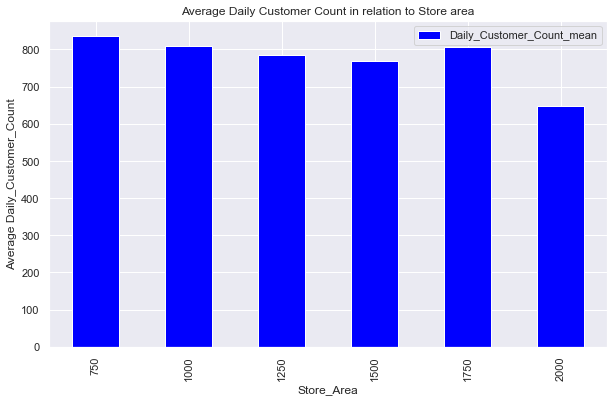

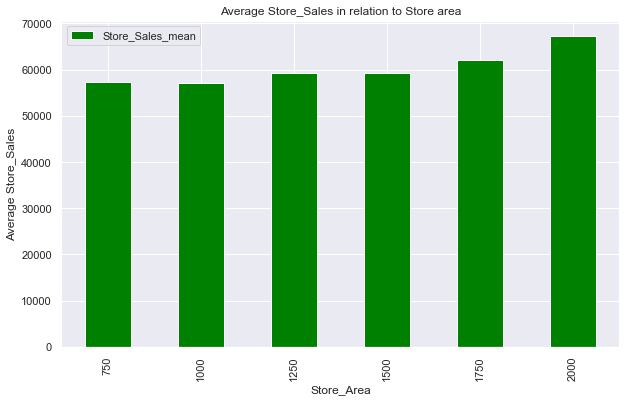

In [33]:
# visualizing the results
subset2.loc[:,['Daily_Customer_Count_mean']].plot(kind = 'bar', color = 'blue', figsize = (10,6));
plot.title('Average Daily Customer Count in relation to Store area')
plot.ylabel('Average Daily_Customer_Count')
subset2.loc[:,['Store_Sales_mean']].plot(kind = 'bar', color = 'green', figsize = (10,6));
plot.title('Average Store_Sales in relation to Store area')
plot.ylabel('Average Store_Sales')

plot.show()

The first figure shows a slight decline in average daily customer visits as the store area increases except at store area between 1500 and 1750. The second figure shows an increasing pattern for the average store sales as the store area increases. This indicates a positive association between Store sales and store area. 

<a id='eda'></a>
## Linear Regression

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
X = data[['Store_Area','Daily_Customer_Count']]
y= data.Store_Sales
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.009661853581353741
[6.73234547 0.82188184]
48704.72807504368


The coefficient of determination  R2 as shown by a score of (0.00966) indicates the weak explanatory power of the model input features for store sales.

<a id='conclusions'></a>
## Conclusions

> The current project aims at analyzing Store Sales dataset. This data set contains information about more than 890 stores. The project included summary statistics as well as visuals describing the features. The features have similar mean and median indicating the absence of outliers. Histograms show that the majority of the features have normal distribution. The data information showed that features have no missing values. 

> The exploratory data analysis reveals the following:
1)  the store sales is not generally associated with the number of customers who visited to stores on an average over month.
2)  there is not a consistent pattern in the relation between average daily customer visits and the store area.
3)  there is a relatively positive association between Store sales and store area.

> Finally, the linear regression shows that the input features have weak explanatory power for the Store sales. 